# Simulacro Final Estadistica

## Nota Aprender conceptos de:
- Gradiente Descendiente
- Metricas
- Evaluacion de Modelos

### 1. Puntos Verdadero - Falso

- El accuracy es una métrica útil para datasets desbalanceados
    - <b>Respuesta</b>: <b>Falso</b>, ya que si el conjunto de datos esta desbalanceado puede tener un alto accuracy sin necesidad de predecir bien los datos de las categorias minoritarias.
- un área bajo la curva de 0.8 es un modelo bueno para cualquier dataset.
    - <b>Respuesta</b>: <b>Falso</b>, depende del contexto este valor puede ser bueno o no.
- Cuando el error en train es mayor que el error en test es overfitting
    - <b>Respuesta</b>: <b>Falso</b>, es al contrario, entre mas alto sea la taza de error en los datos de prueba o test, mas probabilidad existe de overfitting.
- Dropout sirve para reducir el overfitting
    - <b>Respuesta</b>: <b>Verdadero</b>, esta tecnica es usada para que las neuronas olviden cierto porcentaje del aprendizaje obtenido, permitiendo que se evite del overfitting
- Un modelo de clasificación binaria tiene un accuracy de 80% quiere decir es bueno.
    - <b>Respuesta</b>: <b>Falso</b>, para su interpretacion se necesitan otras metricas de evaluacion como la presicion, f1 score, etc. y saber el contexto en el cual se esta implementando.
- Un modelo con un f1 mayor a 0.7 es un buen modelo sin importar el balance de los datos.
    - <b>Respuesta</b>: <b>Verdadero</b>, esta metrica es buena para cuando se tiene un dataset desbalanceado ya que tiene en cuenta tanto los falsos positivos como los falsos negativos, indica el equilibrio existente entre entre la presicion y el recall, un F1-score alto generalmente implica que el modelo está realizando bien tanto en la identificación de casos positivos como en la minimización de falsos positivos y falsos negativos.
- El area-roc AUC y F1 tiene en cuenta la precisión y el recall.
    - <b>Respuesta</b>: <b>Verdadero</b>, porque si
- El pooling es una capa de las redes convolucionales que resume un grupo de píxeles con un valor.
    - <b>Respuesta</b>: <b>Verdadero</b>, el objetivo principal del pooling es reducir la cantidad de información espacial en la representación y, al mismo tiempo, preservar las características más importantes. Al realizar el pooling, se agrupa un conjunto de píxeles y se calcula un solo valor representativo para ese conjunto. Esto ayuda a reducir la cantidad de parámetros y cómputo en la red, lo que puede ayudar a controlar el sobreajuste y acelerar el entrenamiento.

### 2. Exploración, calcule la correlación de las notas con la variable objetivo para cada variable.

In [218]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, f1_score

In [219]:
df_notas = pd.read_csv("./data/notas.csv")
y_true = df_notas['paso']
df_notas.head(10)

,nota1,nota2,nota3,nota4,nota5,nota6,paso
0,0.540253,9.977111,4.317857,3.221008,9.819762,5.590859,1
1,0.858280,4.144396,5.310199,8.118395,2.208087,4.618112,0
2,1.973619,0.312295,7.336357,5.976903,9.366790,5.428688,1
3,5.234680,6.500899,9.200685,6.572454,9.821463,0.377567,1
4,5.224433,9.740583,8.419047,9.559325,8.646798,5.896532,1
5,9.527151,5.023621,3.877708,4.133181,7.143100,2.973361,1
6,7.534349,5.213721,9.430391,8.946452,8.088744,7.324216,1
7,7.368605,0.163319,6.202159,9.512479,2.392936,0.027340,0
8,9.233863,7.595894,1.087520,0.014969,2.895761,9.416189,1
9,7.459771,6.770573,8.347506,4.980939,9.239861,5.638059,1


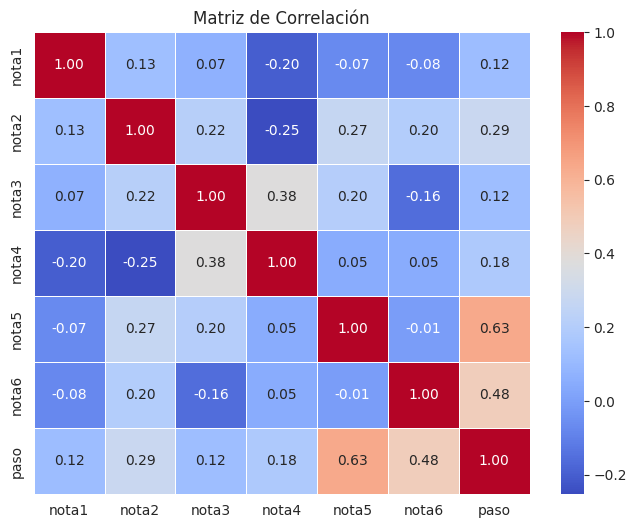

In [220]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_notas.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [221]:
print(df_notas.corr()['paso'])

nota1    0.118309
nota2    0.285092
nota3    0.122225
nota4    0.181168
nota5    0.633251
nota6    0.483557
paso     1.000000
Name: paso, dtype: float64


In [222]:
def calculo_corr_target(x=[],y=[]):
    media_x = x.mean()
    media_y = y.mean()
    sumatoria_num = 0
    sum_y=0
    sum_x=0
    for xi,yi in zip(x,y):
        sumatoria_num += (yi-media_y) * (xi-media_x)
        sum_y += (yi-media_y)**2
        sum_x += (xi-media_x)**2
    return sumatoria_num/(sum_y*sum_x)**0.5

In [223]:
corr = {}
for i in df_notas:
    corr[i] = calculo_corr_target(df_notas['paso'],df_notas[i])
corr

{'nota1': 0.11830901492418319,
 'nota2': 0.28509236207358857,
 'nota3': 0.12222452843392113,
 'nota4': 0.1811676684517339,
 'nota5': 0.6332513594503468,
 'nota6': 0.4835571844555457,
 'paso': 1.0}

### 3. La siguiente tabla contiene el listado de notas del curso de estadística 3 del año anterior. Nuestra variable objetivo es si pasó o no el curso y el error esta dado por error = y *log (1/(1+ e(-g)) + (1-y)*log (1 - 1/(1+ e(-g)) donde g = b1nota1+b2nota2+b3nota3+b4nota4+b5nota5+b6nota6+b0.
- Escriba el algoritmo de gradiente descendiente con un learning rate de 0.1, un bache de 3 y vamos a tomar las muestras en orden. E inicializar los valores en 0


In [224]:
def sigmoid(b, x):
    g = 0
    for i in range(len(x)):
        g+=b[i]*x[i]
    return 1.0/(1.0+np.exp(-g))

def grad_des(lr=float,batch=int,epochs=int):
    rsl = []
    b0 = random.random()
    b1 = random.random()
    b2 = random.random()
    b3 = random.random()
    b4 = random.random()
    b5 = random.random()
    b6 = random.random()
    b = [b0,b1,b2,b3,b4,b5,b6]
    for i in range(epochs):
        log_t = 0
        for j in df_notas.values:
            nota1,nota2,nota3,nota4,nota5,nota6,paso = j
            x = [nota1,nota2,nota3,nota4,nota5,nota6]
            y_pred = sigmoid(b,x)
            log_t += ((1-paso)*np.log(1-y_pred)) + paso*np.log(y_pred)
        b0_gradiente = 0
        b1_gradiente = 0
        b2_gradiente = 0
        b3_gradiente = 0
        b4_gradiente = 0
        b5_gradiente = 0
        b6_gradiente = 0
        for k in range(batch):
            nota1,nota2,nota3,nota4,nota5,nota6,paso = df_notas.sample(n=1).values[0]
            x = [nota1,nota2,nota3,nota4,nota5,nota6]
            b0_gradiente += paso - sigmoid(b,x)
            b1_gradiente += nota1*(paso - sigmoid(b,x))
            b2_gradiente += nota2*(paso - sigmoid(b,x))
            b3_gradiente += nota3*(paso - sigmoid(b,x))
            b4_gradiente += nota4*(paso - sigmoid(b,x))
            b5_gradiente += nota5*(paso - sigmoid(b,x))
            b6_gradiente += nota6*(paso - sigmoid(b,x))
        b0=b0-lr*b0_gradiente/batch
        b1=b1-lr*b1_gradiente/batch
        b2=b2-lr*b2_gradiente/batch
        b3=b3-lr*b3_gradiente/batch
        b4=b4-lr*b4_gradiente/batch
        b5=b5-lr*b5_gradiente/batch
        b6=b6-lr*b6_gradiente/batch
        b = [b0,b1,b2,b3,b4,b5,b6]
        rsl.append([b0,b1,b2,b3,b4,b5,log_t])
        print(f'Epoca {i+1}:'
                f'\n  b0: {b0}'
                f'\n  b1: {b1}'
                f'\n  b2: {b3}'
                f'\n  b3: {b3}'
                f'\n  b4: {b4}'
                f'\n  b5: {b5}'
                f'\n  b6: {b6}'
                f'\n  log_likelihood: {log_t}\n\n')
    return rsl

In [225]:
lr = 0.1
epochs = 7
batch = 3
rsl = grad_des(lr,batch,epochs)

Epoca 1:
  b0: 0.8314986284102406
  b1: 0.19259381845320306
  b2: 1.0082809016248035
  b3: 1.0082809016248035
  b4: 0.4049902809388816
  b5: 0.7095492119669858
  b6: 0.27109956671533014
  log_likelihood: -145.10544610066538


Epoca 2:
  b0: 0.8314985806530417
  b1: 0.19259374472800384
  b2: 1.008280849393158
  b3: 1.008280849393158
  b4: 0.404990118653623
  b5: 0.7095489351021763
  b6: 0.27109921082006017
  log_likelihood: -183.11260382348354


Epoca 3:
  b0: 0.8648318903815125
  b1: 0.20380930216332363
  b2: 1.1173423387426813
  b3: 1.1173423387426813
  b4: 0.6155878364921052
  b5: 0.782034183074591
  b6: 0.5295896617748581
  log_likelihood: -183.1125617967439


Epoca 4:
  b0: 0.8981652236666031
  b1: 0.245187735445597
  b2: 1.4143416384506446
  b3: 1.4143416384506446
  b4: 0.9058533693804396
  b5: 0.8350311162227214
  b6: 0.7171890948386039
  log_likelihood: -204.4644178384937


Epoca 5:
  b0: 0.9314985568750894
  b1: 0.5743688686046641
  b2: 1.7239828049808783
  b3: 1.72398280498087

/tmp/ipykernel_70358/1521355727.py:23: RuntimeWarning: divide by zero encountered in log
  log_t += ((1-paso)*np.log(1-y_pred)) + paso*np.log(y_pred)
/tmp/ipykernel_70358/1521355727.py:23: RuntimeWarning: invalid value encountered in scalar multiply
  log_t += ((1-paso)*np.log(1-y_pred)) + paso*np.log(y_pred)


In [226]:
data_final = rsl[-1]
b = data_final[0:6]
y_pred_proba = []
for j in df_notas.values:
    nota1,nota2,nota3,nota4,nota5,nota6,paso = j
    x = [nota1,nota2,nota3,nota4,nota5,nota6]
    y_pred_proba.append(sigmoid(b,x))
y_pred_proba = pd.DataFrame(y_pred_proba)

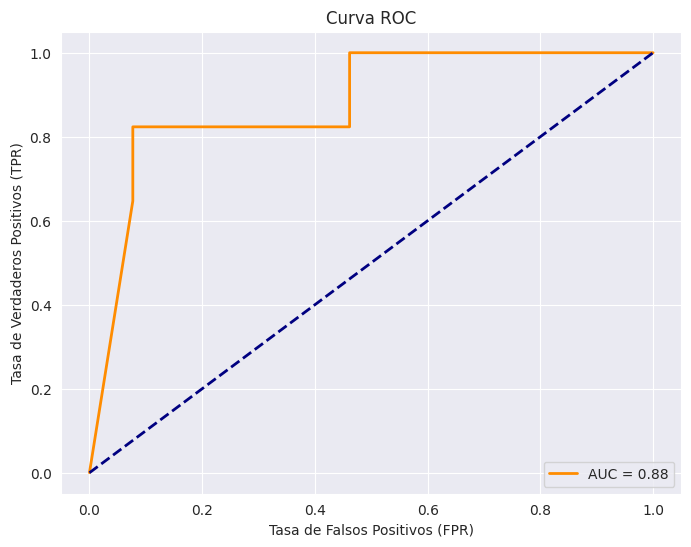

In [227]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

- Hacer las pruebas de escritorio para el gradiente por lo menos 5 iteraciones. Y llenar la siguiente tabla.

<center>

| Iteracion            | b1 | b2 | b3       | b4       | b5       |
|----------------------|----|----|----------|----------|----------|
| 1(observaciones 1-3) |    |    | Fila 1,4 | Fila 1,5 | Fila 1,6 |
| 2(observaciones 4-6) |    |    | Fila 2,4 | Fila 2,5 | Fila 2,6 |
| 3                    |    |    | Fila 3,4 | Fila 3,5 | Fila 3,6 |
| 4                    |    |    | Fila 4,4 | Fila 4,5 | Fila 4,6 |
| 5                    |    |    | Fila 5,4 | Fila 5,5 | Fila 5,6 |
| 6                    |    |    | Fila 6,4 | Fila 6,5 | Fila 6,6 |
| 7                    |    |    | Fila 7,4 | Fila 7,5 | Fila 7,6 |


</center>

- Tomar los valores de b de la iteración 1 (m1) y de la iteración 5 (m2). Cada uno es un modelo diferente. Vamos a tomar las últimas 5 observaciones y vamos a calcular la predicción de m1 y m2. p(y)= 1/(1+ e(-g)), después crear la matriz de confusión para cada modelo, calculator el f1 y definir cuál es el mejor modelo

<center>

| Columna 1 | Columna 2 | Columna 3 |
|-----------|-----------|-----------|
| Fila 1,1  | Fila 1,2  | Fila 1,3  |
| Fila 2,1  | Fila 2,2  | Fila 2,3  |
| Fila 3,1  | Fila 3,2  | Fila 3,3  |
| Fila 4,1  | Fila 4,2  | Fila 4,3  |
| Fila 5,1  | Fila 5,2  | Fila 5,3  |
| Fila 6,1  | Fila 6,2  | Fila 6,3  |

</center>

In [228]:
df_notas_last_5 = df_notas.tail(5)
m1 = rsl[0]
b_m1 = m1[0:6]
m2 = rsl[4]
b_m2 = m2[0:6]
y_pred_m1=[]
y_pred_m2=[]

In [229]:
for values in df_notas_last_5.values:
    nota1,nota2,nota3,nota4,nota5,nota6,paso = values
    x = [nota1,nota2,nota3,nota4,nota5,nota6]
    y_pred_m1.append(sigmoid(b_m1,x))
    y_pred_m2.append(sigmoid(b_m2,x))

In [230]:
# Convertir las predicciones a etiquetas binarias (0 o 1) usando un umbral de decisión (por ejemplo, 0.5)
threshold = 0.5
y_pred_binary_m1 = np.where(np.array(y_pred_m1) > threshold, 1, 0)
y_pred_binary_m2 = np.where(np.array(y_pred_m2) > threshold, 1, 0)

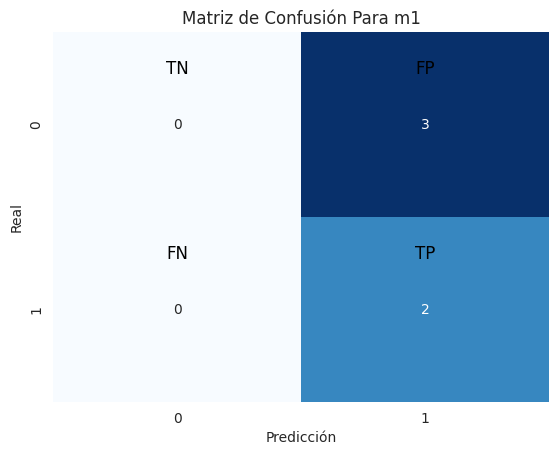

In [231]:
conf_matriz_m1 = confusion_matrix(df_notas_last_5['paso'],y_pred_binary_m1)
sns.heatmap(conf_matriz_m1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Para m1')
plt.text(0.5, 0.2, f'TN', ha='center', va='center', fontsize=12, color='black')
plt.text(0.5, 1.2, f'FN', ha='center', va='center', fontsize=12, color='black')
plt.text(1.5, 0.2, f'FP', ha='center', va='center', fontsize=12, color='black')
plt.text(1.5, 1.2, f'TP', ha='center', va='center', fontsize=12, color='black')
plt.show()

In [232]:
y_pred_m1

[0.9999751867710515,
 0.9999999936992188,
 0.9999999386841856,
 0.9999999985937396,
 0.9999999987011139]

In [235]:
f1_m1 = f1_score(df_notas_last_5['paso'], y_pred_binary_m1)
f1_m1

0.5714285714285715

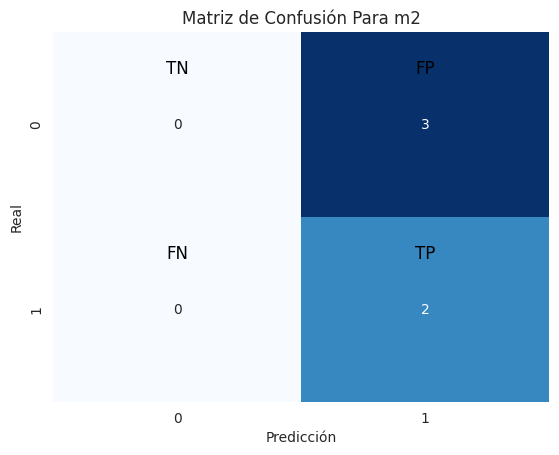

In [233]:
conf_matriz_m2 = confusion_matrix(df_notas_last_5['paso'],y_pred_binary_m2)
sns.heatmap(conf_matriz_m2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Para m2')
plt.text(0.5, 0.2, f'TN', ha='center', va='center', fontsize=12, color='black')
plt.text(0.5, 1.2, f'FN', ha='center', va='center', fontsize=12, color='black')
plt.text(1.5, 0.2, f'FP', ha='center', va='center', fontsize=12, color='black')
plt.text(1.5, 1.2, f'TP', ha='center', va='center', fontsize=12, color='black')
plt.show()

In [234]:
y_pred_m2

[0.9999998748301512,
 0.9999999999999578,
 0.9999999999997975,
 0.9999999999999991,
 0.9999999999999982]

In [236]:
f1_m2 = f1_score(df_notas_last_5['paso'], y_pred_binary_m2)
f1_m2

0.5714285714285715

In [237]:
if f1_m1 > f1_m2:
    print("\nEl modelo m1 es mejor.")
elif f1_m2 > f1_m1:
    print("\nEl modelo m2 es mejor.")
else:
    print("\nAmbos modelos tienen el mismo rendimiento.")


Ambos modelos tienen el mismo rendimiento.
